#Import

In [8]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

#Load Dataset

In [9]:
path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")
df = pd.read_csv(path + "/loan_approval_dataset.csv")
print("Dataset loaded successfully.")

Using Colab cache for faster access to the 'loan-approval-prediction-dataset' dataset.
Dataset loaded successfully.


#Data Preparing

In [10]:
df.columns = df.columns.str.strip()

df['loan_status'] = df['loan_status'].str.strip()
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()

#Data Preprocessing for Modeling

In [11]:
print("\nPreprocessing data for modeling...")
df = df.drop('loan_id', axis=1)

df['education'] = df['education'].apply(lambda x: 1 if x == 'Graduate' else 0)
df['self_employed'] = df['self_employed'].apply(lambda x: 1 if x == 'Yes' else 0)
df['loan_status'] = df['loan_status'].apply(lambda x: 1 if x == 'Approved' else 0)
print("Data preprocessed. All features are now numerical.")


Preprocessing data for modeling...
Data preprocessed. All features are now numerical.


#Feature Selection and Data Splitting

In [12]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Handle Class Imbalance with SMOTE (Bonus)

In [15]:
print("Handling class imbalance with SMOTE...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
unique_classes, class_counts = np.unique(y_train_smote, return_counts=True)
print(f"Classes: {unique_classes}, Counts: {class_counts}")

Handling class imbalance with SMOTE...

Class distribution after SMOTE:
Classes: [0 1], Counts: [2125 2125]


#Model Evaluation

In [16]:
print("\nLogistic Regression Results:")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train_smote)
y_pred_lr = lr_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Rejected', 'Approved']))

print("\nDecision Tree Results:")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)
y_pred_dt = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Rejected', 'Approved']))


Logistic Regression Results:
Accuracy: 0.9192037470725996

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.88      0.91      0.89       323
    Approved       0.94      0.92      0.93       531

    accuracy                           0.92       854
   macro avg       0.91      0.92      0.91       854
weighted avg       0.92      0.92      0.92       854


Decision Tree Results:
Accuracy: 0.9800936768149883

Classification Report:
              precision    recall  f1-score   support

    Rejected       0.97      0.98      0.97       323
    Approved       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



#Data Visualizations

Generating key data visualizations...


/tmp/ipython-input-513129222.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='viridis')
/tmp/ipython-input-513129222.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='cibil_score', data=df, palette='coolwarm')
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


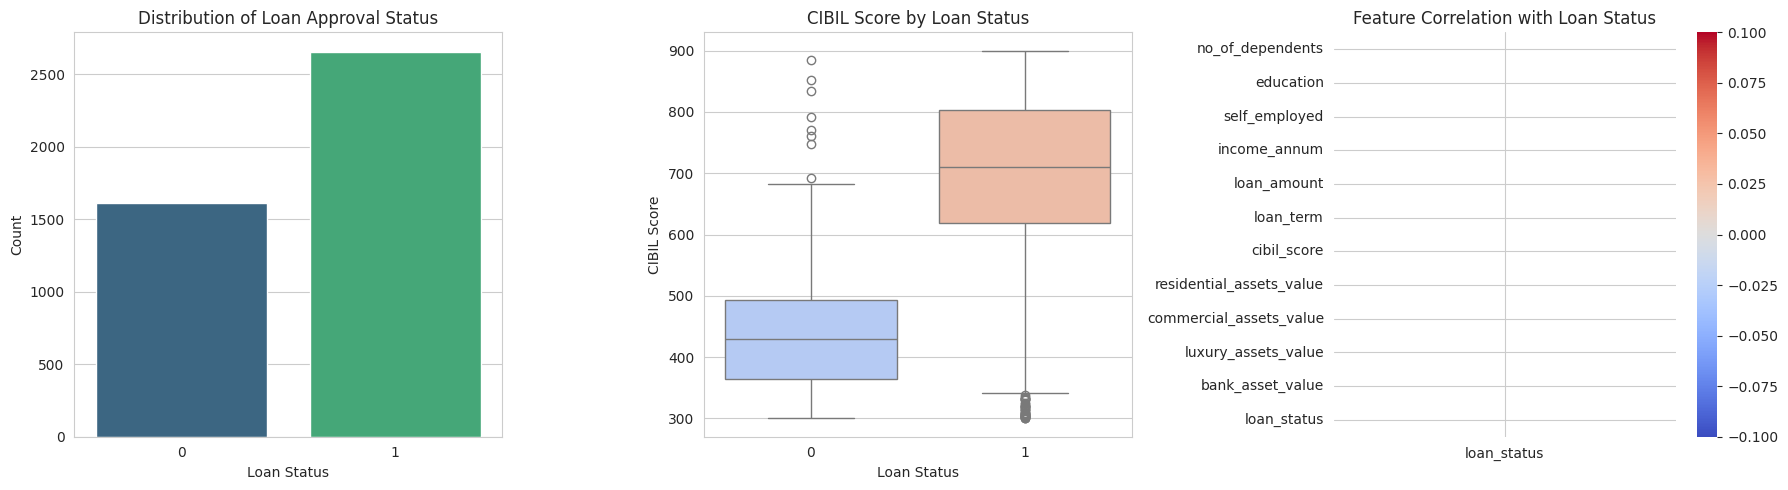

In [20]:
print("Generating key data visualizations...")
sns.set_style("whitegrid")
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='loan_status', data=df, palette='viridis')
plt.title('Distribution of Loan Approval Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.boxplot(x='loan_status', y='cibil_score', data=df, palette='coolwarm')
plt.title('CIBIL Score by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')

plt.subplot(1, 3, 3)
corr_df = df.copy()
corr_df['education'] = corr_df['education'].apply(lambda x: 1 if x == 'Graduate' else 0)
corr_df['self_employed'] = corr_df['self_employed'].apply(lambda x: 1 if x == 'Yes' else 0)
corr_df['loan_status'] = corr_df['loan_status'].apply(lambda x: 1 if x == 'Approved' else 0)
correlation_matrix = corr_df.corr()
sns.heatmap(correlation_matrix[['loan_status']].sort_values(by='loan_status', ascending=False), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation with Loan Status')

plt.tight_layout()
plt.show()